In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [19]:
LOWERBOUNDS = [-2.0, -1.5]
UPPERBOUNDS = [1.0, 1.5]

In [ ]:
def is_in_mandelbrot(point,maximum_iterations):
    z = 0 + 0j
    for n in range(maximum_iterations):
        if abs(z) > 2:
            return 0
        z = z * z + point
    return 1

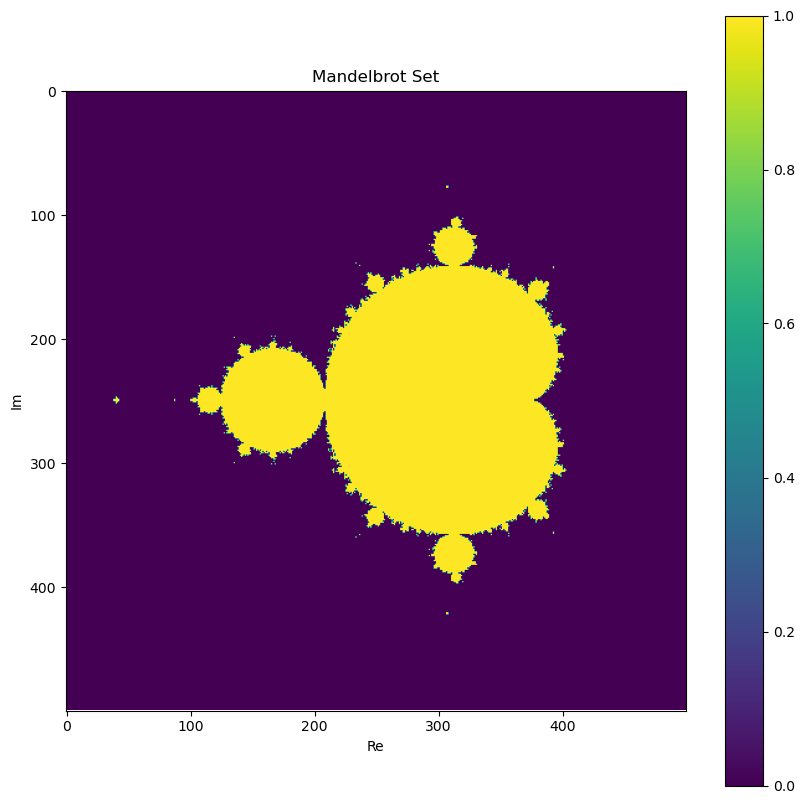

In [ ]:
def plot_mandelbrot(width, height, max_iter):
    '''
    Plots the Mandelbrot set at a given resolution and number of iterations.
    
    Args:
        width (int):    width of generated image in pixels.
        height (int):   height of generated image in pixels.
        max_iter (int): maximum number of iterations to be performed when calculating the set.
    
    Returns:
        None
    '''
    
    # Set arrays to store the mandelbrot set
    x, y = np.linspace(LOWERBOUNDS[0], UPPERBOUNDS[0], width), np.linspace(LOWERBOUNDS[1], UPPERBOUNDS[1], height)
    mandelbrot_set = np.empty((height, width))
    mandelbrot_set_bool = np.empty((height, width))
    
    # Calculate the mandelbrot set
    for i in range(height):
        for j in range(width):
            mandelbrot_set_bool[i, j] = is_in_mandelbrot(x[j] + 1j * y[i], max_iter)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_set_bool)
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()
    
plot_mandelbrot(500, 500, 100)

In [26]:
def get_random_sample(sample_size,sampling_method="random"):
    '''	
    Generate a random sample of points in the square defined by lowerBounds and upperBounds.

    Args:
        sample_size (int): Number of points to sample.
        sampling_method (str): Method to use for sampling. Options are "random", "latin", "orthogonal".

    Returns:
        sample_scaled (numpy.ndarray): Array of shape (sample_size, 2) containing the sampled points.
    '''
    # use latin hypercube sampling to sample points in the square
    if sampling_method == "latin":
        sampler = qmc.LatinHypercube(d=2,strength=1)
        sample = sampler.random(sample_size)
        sample_scaled = qmc.scale(sample, LOWERBOUNDS, UPPERBOUNDS)

    # number of points needs to be p**2 where p is a prime number
    if sampling_method == "orthogonal":
        sampler = qmc.LatinHypercube(d=2,strength=2)
        sample = sampler.random(sample_size)
        sample_scaled = qmc.scale(sample, LOWERBOUNDS, UPPERBOUNDS)
    
    # use pure random sampling
    if sampling_method == "random":
        sample_scaled = np.random.uniform(low=LOWERBOUNDS, high=UPPERBOUNDS, size=(sample_size, 2))
    
    return sample_scaled

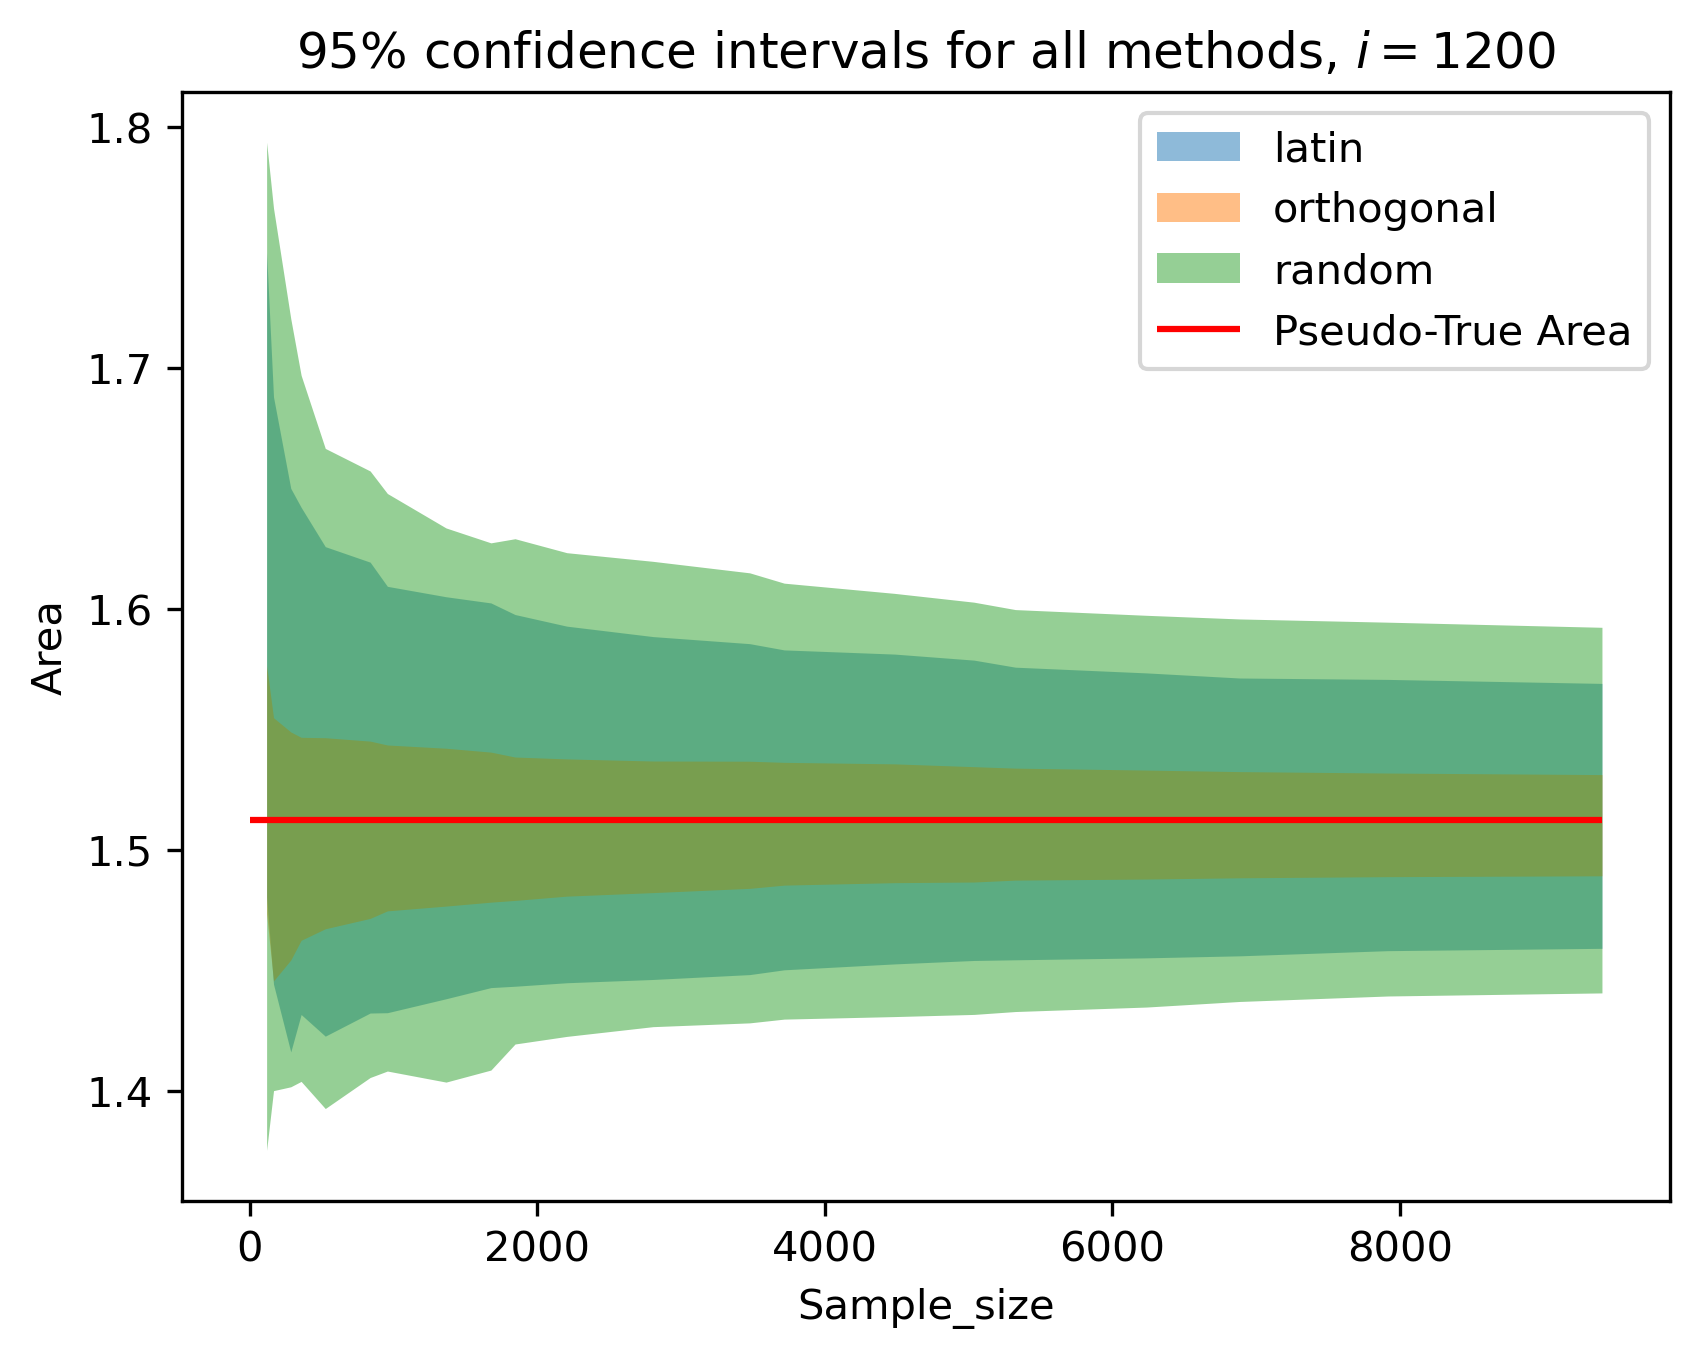

In [90]:
def method_comparison(sample_sizes,iteration_level):
    '''
    Plots the 90% confidence intervals for all 3 methods as the number of samples is increased at a set iteration level.
    
    Args:
        sample_sizes: an array of the different sample sizes as 
    '''
    methods = ['latin','orthogonal','random']
    trials = 10 # for errors
    iterations = iteration_level
    area_of_region = abs(UPPERBOUNDS[0] - LOWERBOUNDS[0]) * abs(UPPERBOUNDS[1] - LOWERBOUNDS[1])
    
    plt.figure(dpi=300)
    
    for method in methods:
        areas = []
        stdevs = []
        area_list = []
        for sample_size in sample_sizes:
            for i in range(trials):
                    sample = get_random_sample(sample_size, method)
                    hits = 0
                    for point in sample:
                        hits += is_in_mandelbrot(point[0] + 1j * point[1], iterations)
                    area_list.append((hits * area_of_region) / sample_size)
                    
            mean_area = np.mean(area_list)
            stdev_area = np.std(area_list)
            
            areas.append(mean_area)
            stdevs.append(stdev_area)
            
        areas = np.array(areas)
        stdevs = np.array(stdevs)
        conf95 = 1.96 * stdevs / np.sqrt(trials)
        plt.fill_between(sample_sizes, areas - conf95, areas + conf95, alpha=.5, linewidth=0, label=method)
        
        #plt.errorbar(sample_sizes, areas, 1.90 * stdevs / np.sqrt(len(sample_sizes)),label=method)
    plt.hlines(1.51224,0,97*97,'r',label='Pseudo-True Area')
    plt.legend() 
    plt.xlabel('Sample_size')
    plt.ylabel('Area')
    plt.title(f'95% confidence intervals for all methods, $i=1200$')
    return 

primes = np.array([11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])
sample_sizes = primes*primes
iteration_level = 1200
method_comparison(sample_sizes,iteration_level)
            

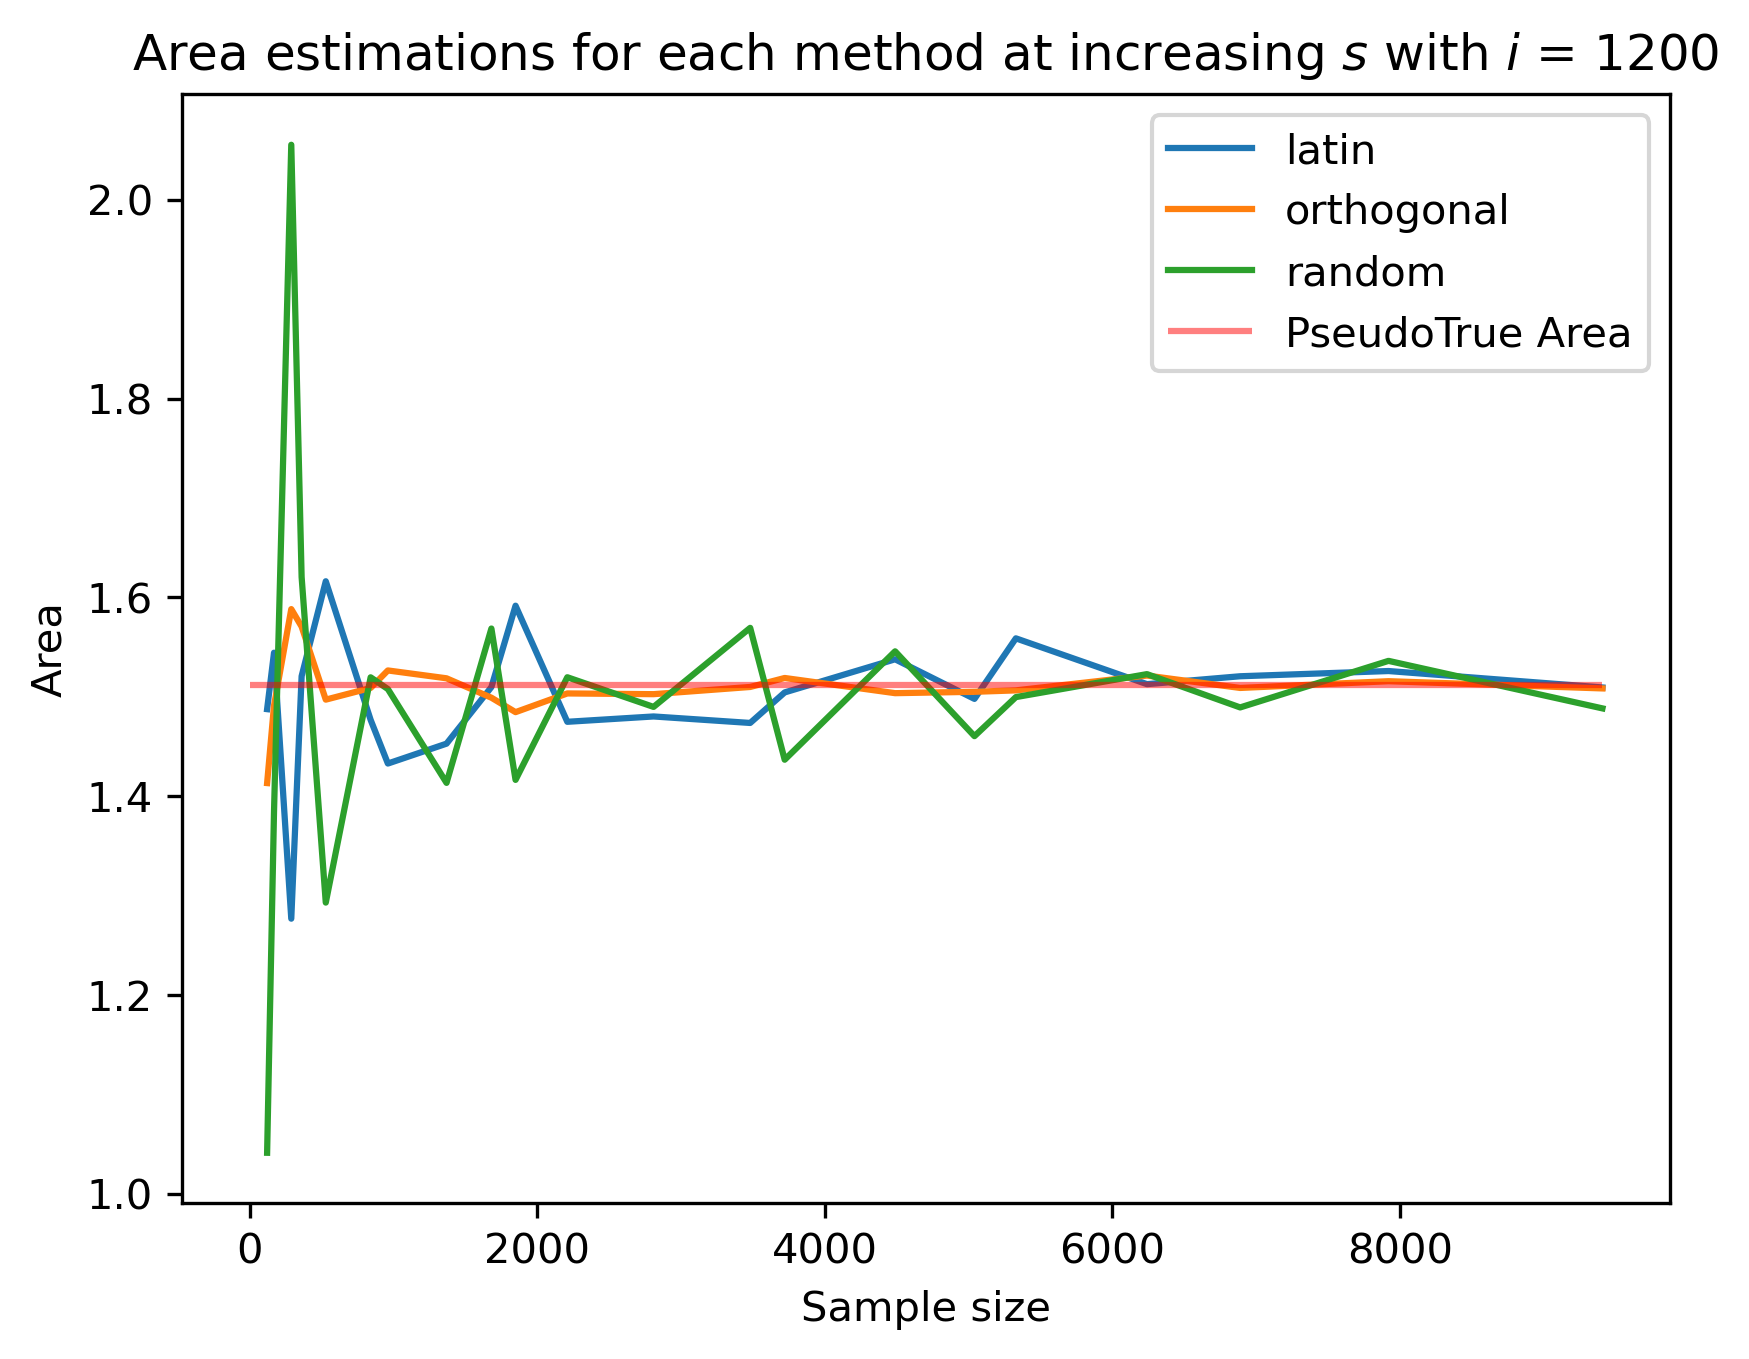

In [88]:
def method_comparison(sample_sizes,iteration_level):
    methods = ['latin','orthogonal','random']
    iterations = iteration_level
    area_of_region = abs(UPPERBOUNDS[0] - LOWERBOUNDS[0]) * abs(UPPERBOUNDS[1] - LOWERBOUNDS[1])
    
    plt.figure(dpi=300)
    for method in methods:
        areas = []
        for sample_size in sample_sizes:
                sample = get_random_sample(sample_size, method)
                hits = 0
                for point in sample:
                    hits += is_in_mandelbrot(point[0] + 1j * point[1], iterations)
                areas.append((hits * area_of_region) / sample_size)
        
        plt.plot(sample_sizes, areas,label=method)
        #plt.errorbar(sample_sizes, areas,stdevs)
    
    plt.title(f'Area estimations for each method at increasing $s$ with $i$ = 1200')
    plt.xlabel('Sample size')
    plt.ylabel('Area')
    plt.hlines(1.51224,0,97*97,'r',alpha=0.5,label='PseudoTrue Area')
    plt.legend() 
    plt.show()
    
    
    return 

primes = np.array([11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])
sample_sizes = primes*primes
iteration_level = 1200
method_comparison(sample_sizes,iteration_level)
            